## implementation of decision tree classifier on salaries dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
X = df.drop('salary_more_then_100k',axis='columns')
y = df['salary_more_then_100k']


In [6]:
le_comp = LabelEncoder()
le_job = LabelEncoder()
le_deg = LabelEncoder()
X['company_n']= le_comp.fit_transform(X['company'])
X['job_n']= le_job.fit_transform(X['job'])
X['deg_n'] = le_deg.fit_transform(X['degree'])


In [7]:
X

,company,job,degree,company_n,job_n,deg_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [8]:
X_new = X.drop(['company','job','degree'],axis='columns')

In [9]:
X_new

,company_n,job_n,deg_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


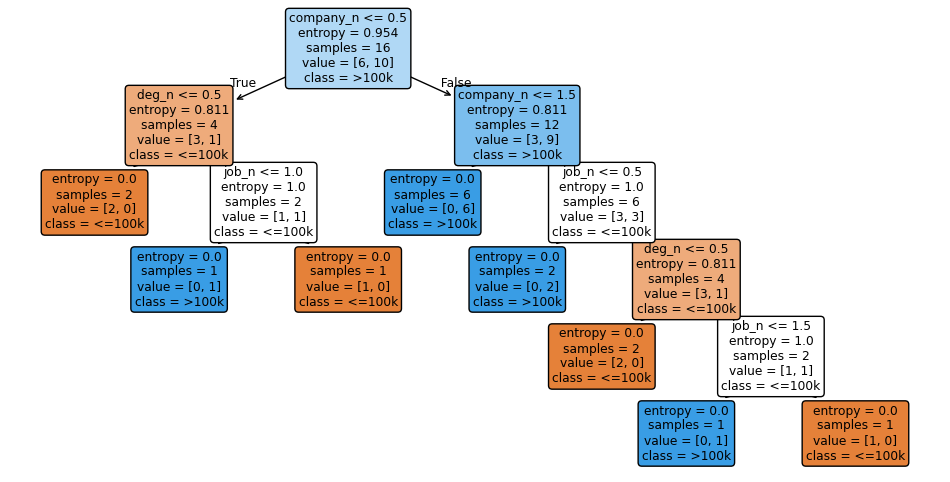

: 

In [ ]:
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_new,y)
plt.figure(figsize=(12,6))
tree.plot_tree(
    model,
    feature_names=X_new.columns,
    class_names=["<=100k",">100k"],
    filled=True,
    rounded=True
)
plt.show()